<a href="https://colab.research.google.com/github/esa-prakasa/ConvNet/blob/master/binaryclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://medium.com/datadriveninvestor/building-neural-network-using-keras-for-classification-3a3656c726c1

In [0]:
# Load dan mount Google Drive
from google.colab import drive

# Pilihan user authorization dengan menggunakan account Google
drive.mount('/content/drive')

# Pilihan user authorization dengan menggunakan account Google

path = "/content/drive/My Drive/Colab Notebooks/dataset"
!ls -l "/content/drive/My Drive/Colab Notebooks/dataset"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
total 20383
-rw------- 1 root root      168 Feb  7 04:37  abc.csv
-rw------- 1 root root   310090 Feb  7 04:18  juanda.jpg
-rw------- 1 root root      151 Feb  7 04:32 'pima-indians-diabetes (1).data.csv.gdoc'
-rw------- 1 root root    23278 Feb  7 03:47  pima-indians-diabetes.data.csv
-rw------- 1 root root      151 Feb  7 04:33  pima-indians-diabetes.data.csv.gdoc
-rw------- 1 root root 20535894 Feb  7 08:01  rgb20200207145649.csv


In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#os.chdir(path)
#dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/pima-indians-diabetes.data.csv")
#dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/abc.csv")

dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset/rgb20200207145649.csv")


In [0]:
dataset.head(5)

,i,j,red,green,blue,class
0,0,0,135,135,143,0
1,0,1,142,142,150,0
2,0,2,165,166,171,0
3,0,3,61,61,69,0
4,0,4,74,73,87,0


In [0]:
dataset.describe(include='all')

,i,j,red,green,blue,class
count,945081.000000,945081.000000,945081.000000,945081.000000,945081.000000,945081.000000
mean,319.000000,739.000000,125.047289,129.563799,123.575119,0.139677
std,184.463283,426.950652,76.297035,73.658336,77.111802,0.346652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,159.000000,369.000000,64.000000,73.000000,64.000000,0.000000
50%,319.000000,739.000000,108.000000,110.000000,103.000000,0.000000
75%,479.000000,1109.000000,171.000000,173.000000,170.000000,0.000000
max,638.000000,1478.000000,255.000000,255.000000,255.000000,1.000000


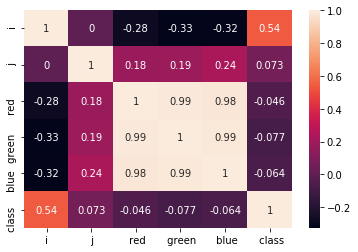

In [0]:
sns.heatmap(dataset.corr(), annot=True)

In [0]:
X= dataset.iloc[:,0:5]
Y= dataset.iloc[:,5]

X.head(5)

,i,j,red,green,blue
0,0,0,135,135,143
1,0,1,142,142,150
2,0,2,165,166,171
3,0,3,61,61,69
4,0,4,74,73,87


In [0]:
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name:  class, dtype: int64

In [0]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.72934236, -1.73088011,  0.13044696,  0.07380296,  0.25190556],
       [-1.72934236, -1.72853792,  0.22219369,  0.16883639,  0.34268289],
       [-1.72934236, -1.72619572,  0.52364724,  0.49466526,  0.61501489],
       ...,
       [ 1.72934236,  1.72619572, -0.19721994, -0.23844971, -0.16307654],
       [ 1.72934236,  1.72853792, -0.18411327, -0.2248735 , -0.15010835],
       [ 1.72934236,  1.73088011, -0.17100659, -0.2112973 , -0.13714016]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [0]:
from keras import Sequential
from keras.layers import Dense

In [0]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(3, activation='relu', kernel_initializer='random_normal', input_dim=5))
#Second  Hidden Layer
classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 3         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [0]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=20, epochs=10)


# serialize model to JSON
model_json = classifier.to_json()
with open("/content/drive/My Drive/Colab Notebooks/dataset/road_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("/content/drive/My Drive/Colab Notebooks/dataset/road_wg_model.h5")
print("Saved model to disk")

Epoch 1/10
661556/661556 [==============================] - 41s 62us/step - loss: 0.0859 - acc: 0.9666
Epoch 2/10
661556/661556 [==============================] - 41s 62us/step - loss: 0.0859 - acc: 0.9666
Epoch 3/10
661556/661556 [==============================] - 39s 60us/step - loss: 0.0858 - acc: 0.9666
Epoch 4/10
661556/661556 [==============================] - 39s 59us/step - loss: 0.0858 - acc: 0.9666
Epoch 5/10
661556/661556 [==============================] - 40s 61us/step - loss: 0.0858 - acc: 0.9666
Epoch 6/10
661556/661556 [==============================] - 40s 60us/step - loss: 0.0857 - acc: 0.9667
Epoch 7/10
661556/661556 [==============================] - 40s 60us/step - loss: 0.0858 - acc: 0.9666
Epoch 8/10
661556/661556 [==============================] - 39s 59us/step - loss: 0.0858 - acc: 0.9667
Epoch 9/10
661556/661556 [==============================] - 39s 60us/step - loss: 0.0858 - acc: 0.9666
Epoch 10/10
661556/661556 [==============================] - 40s 61us/ste

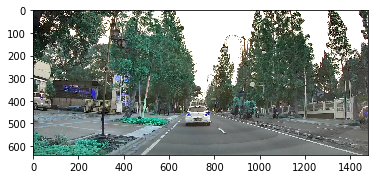

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/My Drive/Colab Notebooks/dataset/juantest.jpg")
plt.imshow(img)


In [0]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

661556/661556 [==============================] - 12s 18us/step


[0.08558221707130852, 0.9668418093098113]

In [0]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


T= sum(sum(cm))

cm=cm/T
print(cm)

acc = cm[0,0] + cm[1,1]
print(acc)

[[0.83129883 0.02861829]
 [0.00433824 0.13574464]]
0.9670434705934221
